In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [15]:
df = pd.read_csv("../data/german_credit_data.csv")


In [16]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [17]:
print(df.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [21]:
df.shape

(1000, 11)

In [9]:
print(df["Housing"].unique())


['own' 'free' 'rent']


In [22]:
print(df["Saving accounts"].unique())


[nan 'little' 'quite rich' 'rich' 'moderate']


#### Checking null values

In [24]:
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### Checking Duplicate Values

In [46]:
dup=df.duplicated()
print(dup.sum())

0


In [25]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


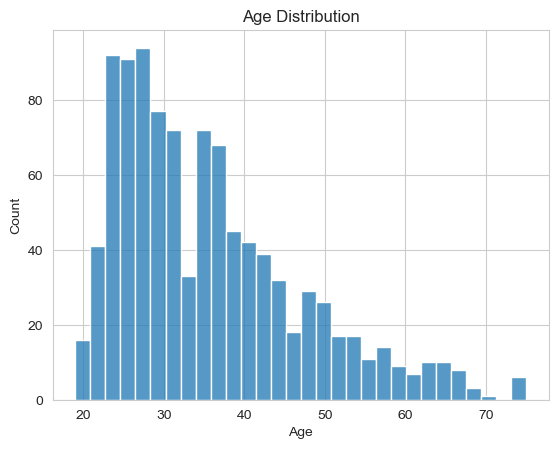

In [26]:
sns.histplot(df["Age"], bins=30)
plt.title("Age Distribution")
plt.show()


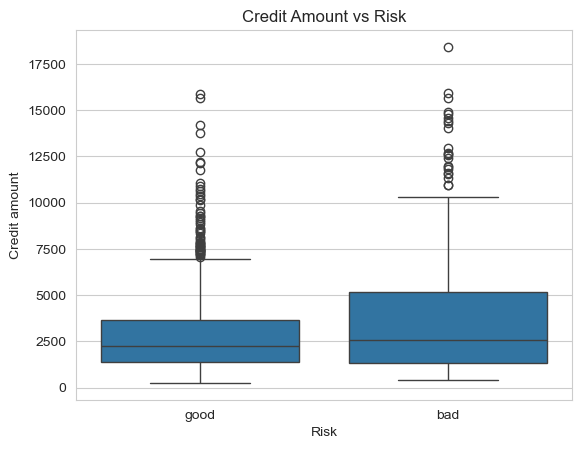

In [27]:
sns.boxplot(x="Risk", y="Credit amount", data=df)
plt.title("Credit Amount vs Risk")
plt.show()


High credit amount correlates with higher default risk

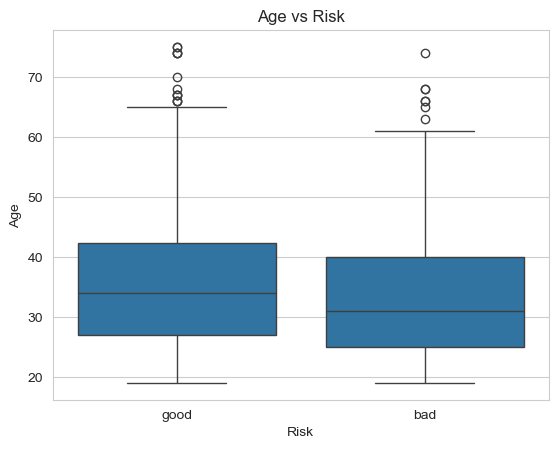

In [ ]:
sns.boxplot(x="Risk", y="Age", data=df)
plt.title("Age vs Risk")
plt.show()


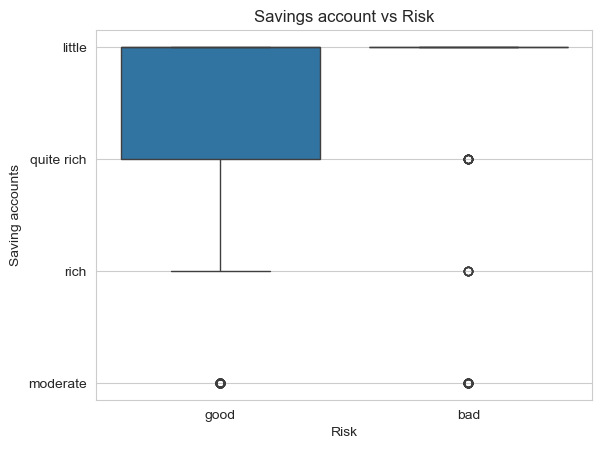

In [41]:
sns.boxplot(x="Risk", y="Saving accounts", data=df)
plt.title("Savings account vs Risk")
plt.show()


This shows us that customers  with no savings have more risk


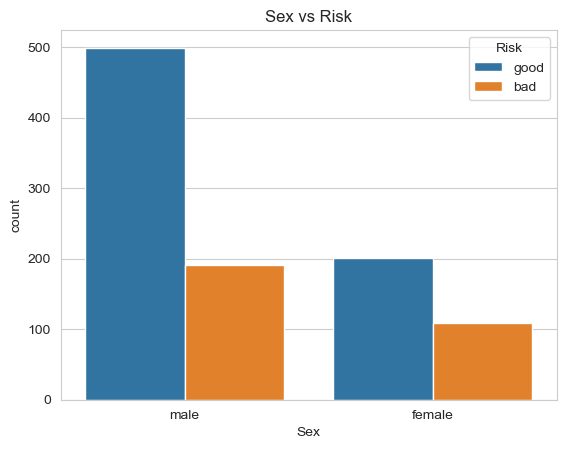

In [36]:
sns.countplot(x="Sex", hue="Risk", data=df)
plt.title("Sex vs Risk")
plt.show()


compared to men and women men have higer percentage  of low risk while women have less than 50 percent low risk rate 
so we can say that women are more  riskier than men 

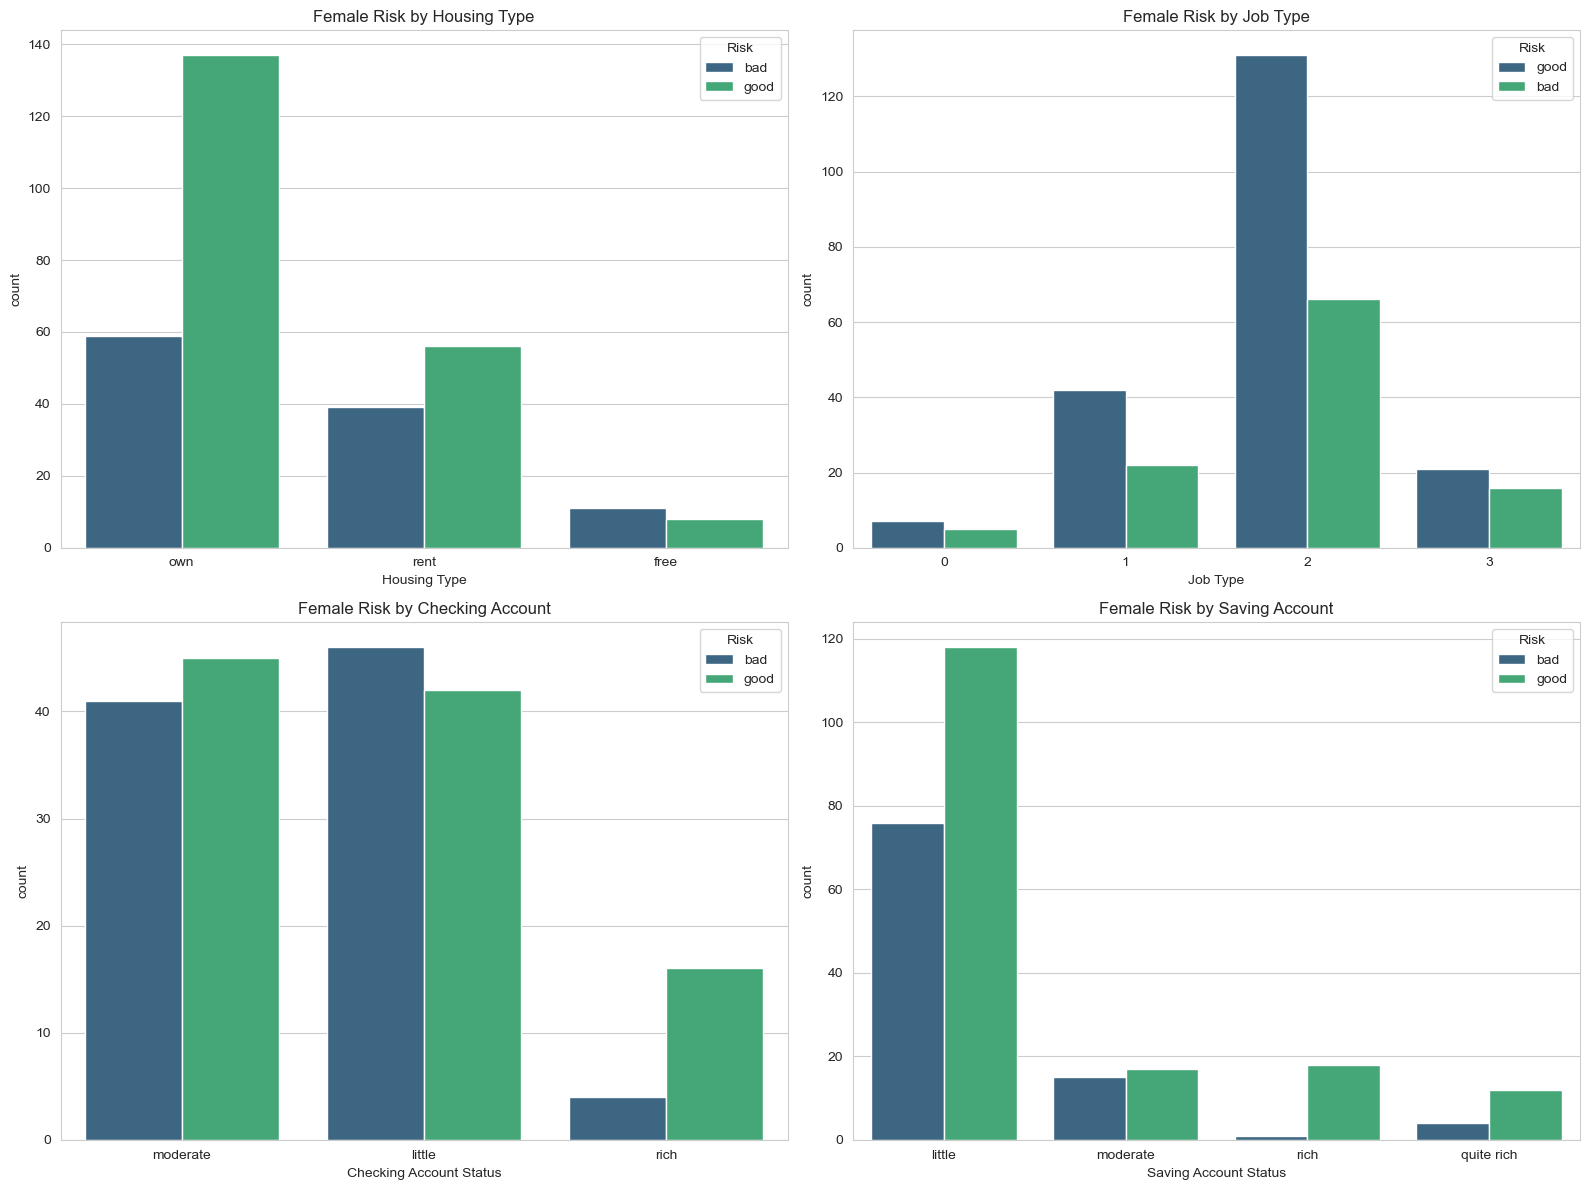

In [ ]:

df_female = df[df['Sex'] == 'female']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Housing Type 
sns.countplot(data=df_female, x='Housing', hue='Risk', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Female Risk by Housing Type")
axes[0, 0].set_xlabel("Housing Type")

# Plot 2: Job Type 
sns.countplot(data=df_female, x='Job', hue='Risk', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title("Female Risk by Job Type")
axes[0, 1].set_xlabel("Job Type")

# Plot 3: Checking Account 
sns.countplot(data=df_female, x='Checking account', hue='Risk', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Female Risk by Checking Account")
axes[1, 0].set_xlabel("Checking Account Status")

# Plot 4: Saving Accounts 
sns.countplot(data=df_female, x='Saving accounts', hue='Risk', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Female Risk by Saving Account")
axes[1, 1].set_xlabel("Saving Account Status")


plt.tight_layout()
plt.show()

We Cannot exactly differentiate what the main cause of this high default percent of female is,so this feature is removed to avoide bais
might be other reasons affecting this


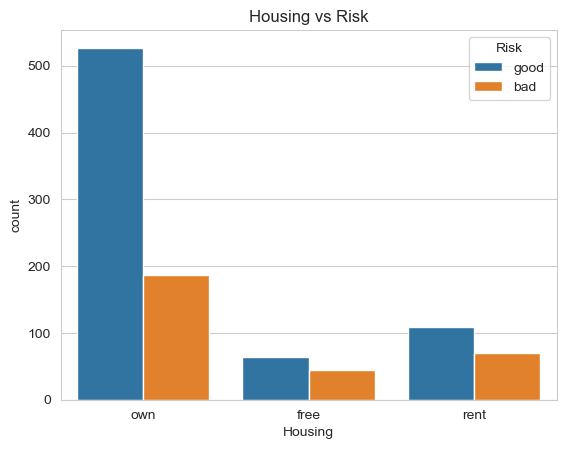

In [ ]:
sns.countplot(x="Housing", hue="Risk", data=df)
plt.title("Housing vs Risk")
plt.show()


people with rent are risker than people who own an house

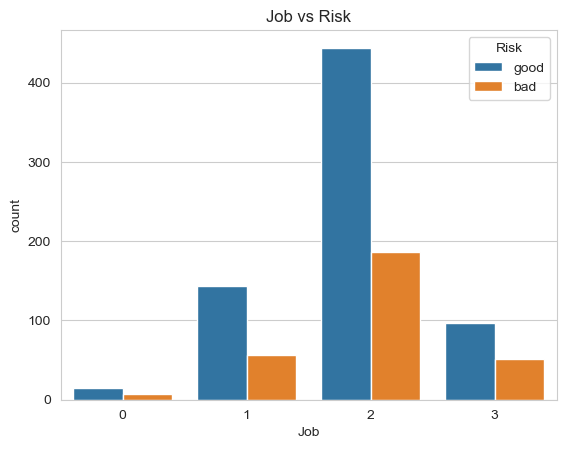

In [38]:
sns.countplot(x="Job", hue="Risk", data=df)
plt.title("Job vs Risk")
plt.show()


([<matplotlib.axis.XTick at 0x2cb1bb1e5d0>,
 [Text(0, 0, 'Has at least one account info'),
  Text(1, 0, 'Both accounts are NULL')])

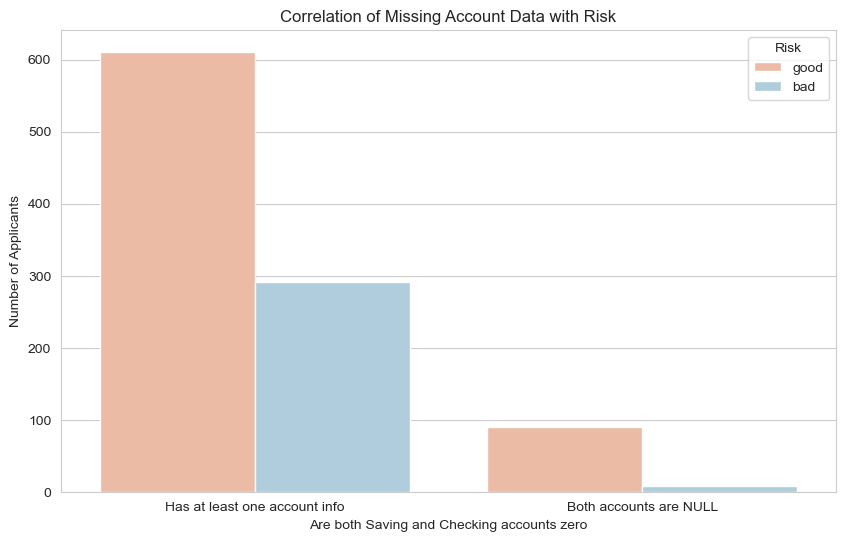

In [106]:
df['Both_Accounts_Null'] = df['Saving accounts'].isnull() & df['Checking account'].isnull()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Both_Accounts_Null', hue='Risk', palette='RdBu')

plt.title("Correlation of Missing Account Data with Risk")
plt.xlabel("Are both Saving and Checking accounts zero")
plt.ylabel("Number of Applicants")
plt.xticks([0, 1], ['Has at least one account info', 'Both accounts are NULL'])

No important pattern to be seen in this graph

C:\Users\aryan\AppData\Local\Temp\ipykernel_15084\3554704032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_business, x='Risk', palette='magma')


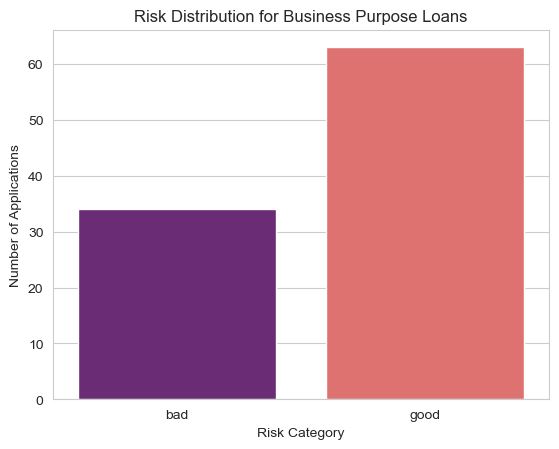

In [109]:

df_business = df[df['Purpose'] == 'business']
sns.countplot(data=df_business, x='Risk', palette='magma')
plt.title("Risk Distribution for Business Purpose Loans")
plt.xlabel("Risk Category")
plt.ylabel("Number of Applications")

plt.show()

Business purpose lonas are more risky   (busniness Domain it self is highly risky)

### Adding a new feature


##### 1.  Credit per month
credit amount / duration

In [42]:
df["Credit_per_month"] = df["Credit amount"] / df["Duration"]


In [43]:

df[["Credit amount", "Duration", "Credit_per_month"]].head()


,Credit amount,Duration,Credit_per_month
0,1169,6,194.833333
1,5951,48,123.979167
2,2096,12,174.666667
3,7882,42,187.666667
4,4870,24,202.916667


feature added which calculates risk onn the basis of credit to be paid per month

##### 2. Financial stress feature 
No savings + No current amount + rent 

In [71]:
df["Stress_score"] = (
    df["Saving accounts"].isnull().astype(int) +
    df["Checking account"].isnull().astype(int) +
    (df["Housing"] == "rent").astype(int)
)


In [73]:
print(df["Stress_score"].unique())

[1 0 2 3]


##### 3. Financial Strength

convert savings & checking levels into numeric strength scores and combining them.

In [75]:
savings_map = {
    "little": 1,
    "moderate": 2,
    "rich": 3,
    "quite rich": 4
}

df["Saving_score"] = df["Saving accounts"].map(savings_map)
df["Saving_score"] = df["Saving_score"].fillna(0)



In [76]:
checking_map = {
    "little": 1,
    "moderate": 2,
    "rich": 3
}

df["Checking_score"] = df["Checking account"].map(checking_map)
df["Checking_score"] = df["Checking_score"].fillna(0)


In [77]:
df["Financial_strength"] = df["Saving_score"] + df["Checking_score"]


In [78]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit_per_month,Stress_score,Saving_score,Checking_score,Financial_strength
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,194.833333,1,0.0,1.0,1.0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,123.979167,0,1.0,2.0,3.0
2,2,49,male,1,own,little,NaN,2096,12,education,good,174.666667,1,1.0,0.0,1.0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,187.666667,0,1.0,1.0,2.0
4,4,53,male,2,free,little,little,4870,24,car,bad,202.916667,0,1.0,1.0,2.0


In [82]:
print(df["Purpose"].unique())

['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


##### 4. Business Risk

saving not availabe +checking balance = 0 and Loan for business

In [83]:
df["Business_risk"] = (
    (df["Purpose"] == "business") &
    df["Saving accounts"].isnull() &
    df["Checking account"].isnull()
).astype(int)


In [85]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit_per_month,Stress_score,Saving_score,Checking_score,Financial_strength,Business_risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,194.833333,1,0.0,1.0,1.0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,123.979167,0,1.0,2.0,3.0,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,174.666667,1,1.0,0.0,1.0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,187.666667,0,1.0,1.0,2.0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,202.916667,0,1.0,1.0,2.0,0


In [86]:
print(df["Business_risk"].unique())

[0 1]


### Data Encoding

##### 1. Risk Encoding

In [110]:
df["Risk"] = df["Risk"].map({"good": 0, "bad": 1})


##### 2. Sex Encoding 

In [113]:
df["Sex"] = df["Sex"].map({
    "male": 0,
    "female": 1
})


##### 3. Housing Encoding

In [116]:
df["Housing"] = df["Housing"].map({
    "own": 2,
    "rent": 1,
    "free": 0
})


##### 4. Purpose encoding 
we use one hot encoding

In [118]:
df = pd.get_dummies(df, columns=["Purpose"], drop_first=True)


In [125]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


##### 5. Drop the unnecessary columns 
we need to drop the unnecessary columns  as we have aleady extracted information from that

In [ ]:
df = df.drop([
    "Saving accounts",
    "Checking account",
    "Unnamed: 0"
], axis=1)


In [126]:
df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Risk,Credit_per_month,Stress_score,Saving_score,...,Financial_strength,Business_risk,Both_Accounts_Null,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,0,2,2,1169,6,0,194.833333,1,0.0,...,1.0,0,0,0,0,0,0,1,0,0
1,22,1,2,2,5951,48,1,123.979167,0,1.0,...,3.0,0,0,0,0,0,0,1,0,0
2,49,0,1,2,2096,12,0,174.666667,1,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,45,0,2,0,7882,42,0,187.666667,0,1.0,...,2.0,0,0,0,0,0,1,0,0,0
4,53,0,2,0,4870,24,1,202.916667,0,1.0,...,2.0,0,0,1,0,0,0,0,0,0


In [127]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Risk',
       'Credit_per_month', 'Stress_score', 'Saving_score', 'Checking_score',
       'Financial_strength', 'Business_risk', 'Both_Accounts_Null',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Sex                          1000 non-null   int64  
 2   Job                          1000 non-null   int64  
 3   Housing                      1000 non-null   int64  
 4   Credit amount                1000 non-null   int64  
 5   Duration                     1000 non-null   int64  
 6   Risk                         1000 non-null   int64  
 7   Credit_per_month             1000 non-null   float64
 8   Stress_score                 1000 non-null   int32  
 9   Saving_score                 1000 non-null   float64
 10  Checking_score               1000 non-null   float64
 11  Financial_strength           1000 non-null   float64
 12  Business_risk                1000 non-null   int32  
 13  Both_Accounts_Null 

In [130]:
df.isnull().sum()

Age                            0
Sex                            0
Job                            0
Housing                        0
Credit amount                  0
Duration                       0
Risk                           0
Credit_per_month               0
Stress_score                   0
Saving_score                   0
Checking_score                 0
Financial_strength             0
Business_risk                  0
Both_Accounts_Null             0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64

#### Save the Data in CSV

In [132]:
df.to_csv("../data/processed_data.csv", index=False)
